# Cherry Ho

## Research question/interests

- How many countries won the cup as away teams?
- Which country has the most cup as away teams?
- Which country has the most median goals per match during the year they won the cup as away teams? (let me guess. Brazil)

How many average goals did each countries score? Which country has the most (let me guess. Brazil)

In [ ]:
import project_functions2 as p2
import seaborn as sns

### Raw Data 1 Analysis

In [ ]:
raw1=p2.pd.read_csv("../data/raw/WorldCups.csv")
raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [ ]:
raw1.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
raw1.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [ ]:
raw1.shape

(20, 10)

In [ ]:
raw1.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [ ]:
raw1.nunique()

Year              20
Country           15
Winner             9
Runners-Up        10
Third             14
Fourth            16
GoalsScored       17
QualifiedTeams     5
MatchesPlayed      9
Attendance        20
dtype: int64

### Raw Data 2 Analysis

In [ ]:
raw2=p2.pd.read_csv("../data/raw/WorldCupMatches.csv")
raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [ ]:
raw2.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
raw2.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw2.shape

(4572, 20)

In [ ]:
raw2.describe

<bound method NDFrame.describe of         Year              Datetime    Stage         Stadium         City  \
0     1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1     1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2     1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3     1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4     1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    
...      ...                   ...      ...             ...          ...   
4567     NaN                   NaN      NaN             NaN          NaN   
4568     NaN                   NaN      NaN             NaN          NaN   
4569     NaN                   NaN      NaN             NaN          NaN   
4570     NaN                   NaN      NaN             NaN          NaN   
4571     NaN                   NaN      NaN             NaN          NaN   

     Home Team Name  Home Team Goals  Away Team Goals

In [ ]:
raw2.nunique()

Year                     20
Datetime                602
Stage                    23
Stadium                 181
City                    151
Home Team Name           78
Home Team Goals          11
Away Team Goals           7
Away Team Name           83
Win conditions           43
Attendance              622
Half-time Home Goals      7
Half-time Away Goals      6
Referee                 366
Assistant 1             387
Assistant 2             408
RoundID                 101
MatchID                 836
Home Team Initials       77
Away Team Initials       82
dtype: int64

### Task 2: Data Analysis Pipeline

In [ ]:
df = p2.load_and_process1("../data/raw/WorldCups.csv")
df

,Year,Winner
0,1938,Italy
1,1950,Uruguay
2,1954,Germany
3,1958,Brazil
4,1962,Brazil
5,1970,Brazil
6,1982,Italy
7,1986,Argentina
8,1990,Germany
9,1994,Brazil


In [ ]:
df2=p2.load_and_process2("../data/raw/WorldCupMatches.csv")
df2

,Year,Team Name,Team Goals
0,1938,Italy,2.0
1,1938,Italy,3.0
2,1938,Italy,2.0
3,1938,Italy,4.0
4,1950,Uruguay,8.0
...,...,...,...
74,2014,Germany,2.0
75,2014,Germany,2.0
76,2014,Germany,4.0
77,2014,Germany,1.0


In [ ]:
df.to_csv('CleanedWorldCups(Analysis2).csv',index=False)
df2.to_csv('CleanedWorldCupsMatches-WinnerOnly(Analysis2).csv',index=False)

## EDA

In [ ]:
df.nunique()

Winner    6
dtype: int64

Conclusion 1: 6 countries have won as visiting teams (There are around 200 countries. Guess sports are just for the rich)

In [ ]:
df['Winner'].value_counts(ascending=False)

Brazil       5
Italy        3
Germany      3
Uruguay      1
Argentina    1
Spain        1
Name: Winner, dtype: int64

<AxesSubplot:title={'center':'# of times a country won as an away team'}>

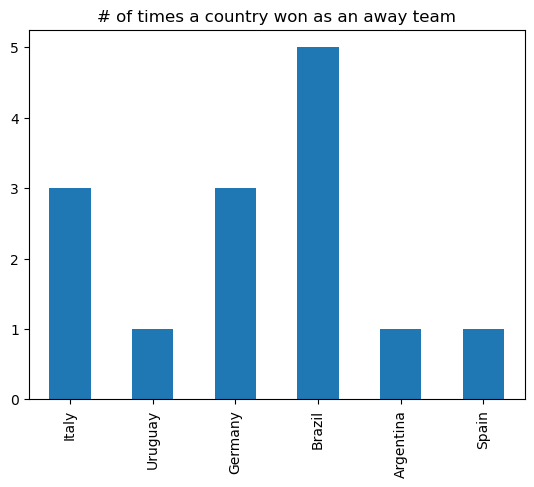

In [ ]:
#A Plot of how many times a country won as home team
# sns.countplot(x='Winner',data=df)
df['Winner'].value_counts(sort=False).plot.bar(title="# of times a country won as an away team")


Conclusion 1-2: 6 countries won when they are away thems;
Brazil wins the most cup (the legend is real after all. As someone who hating watching sports, I guess I learn sth new).

In [ ]:
# df2=df.drop("Year", axis=1).groupby("Winner").mean().reset_index()
# df2

In [ ]:
# sns.barplot(x='Winner',y='GoalsScored',data=df2).set(title="Average Goals Scored per Winning Countries")

<AxesSubplot: xlabel='Team Name', ylabel='Team Goals'>

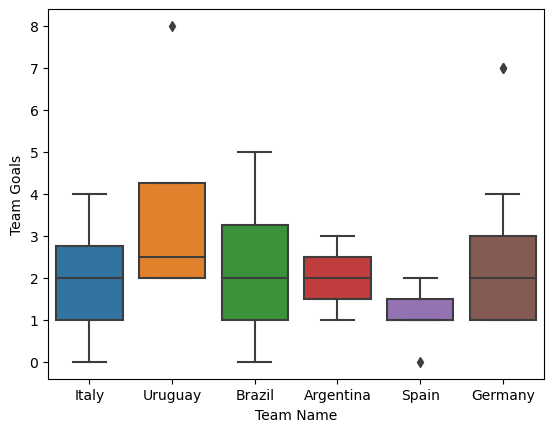

In [ ]:
sns.boxplot(x='Team Name',y='Team Goals',data=df2)

Conclusion 3: Germany and Uruguary has the highest median goals